## <font color=red> Who survived when the Titanic sank? An example for exploratory data analysis</font>

More info on the sinking of the Titanic in [Encyclopedia Titanica](http://www.encyclopedia-titanica.org) or Wikipedia

In [2]:
# Import code libraries or "modules" in Python lingo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import datascience


In [123]:
# Read the data into a data frame (table) titanic_df and display the first few rows

titanic_df = pd.read_csv('../Data/titanic3.csv')
titanic_df.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


#### Rows of the data frame correspond to passengers. Columns correspond to properties (or "features") of passengers:

    pclass     cabin class
    survived   0 = "no", 1 = "yes"
    name
    sex
    age
    sibsp      number of siblings or spouses aboard
    parch      number of parents/children aboard
    ticket     ticket number
    fare       passenger fare (in British pounds)
    cabin      cabin number
    embarked   port of embarkation (C + cherbourg; Q = Queenstown; S = Southampton
    boat       lifeboat number
    body       body identification number
    home.dest  home/destination

#### We often refer to the rows as "cases" and to the columns as "variables"

In [100]:
# Let's see how many rows and columns there are

titanic_df.shape

(1310, 14)

In [125]:
# So the data frame "titanic_df" has 1,310 rows, numbered 0..1309
# The spreadsheet "titanic3.csv" has also 1,310 rows, but row 1 contains 
# the column labels. So we only have data on 1,309 passengers.
# 
# Something is amiss. Let's look at the first row of the data frame

titanic_df.loc[0, :]

KeyError: 'the label [0] is not in the [index]'

In [122]:
# That's correct. Look at the last row

titanic_df.iloc[1309,:]
titanic_df[:][1309]

IndexError: single positional indexer is out-of-bounds

In [121]:
# So pd.read_csv has read an empty row. Let's get rid of that

titanic_df = titanic_df.iloc[0:1309, :]

# titanic_df.tail()
# titanic_df.index

In [29]:
# There are missing values in the data. Let's see how many

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.2+ KB


In [119]:
# Let's pick a subset of the features for analysis
var_names = ["pclass", "survived", "sex", "age", "sibsp", "parch", "fare"] 
titanic_red = titanic_df[var_names]
titanic_red.shape
list(titanic_red.columns)

TypeError: 'Index' object is not callable

In [98]:
# Alternative ways of selecting columns
varnames = ["pclass", "survived", "name", "sex", "age", 
            "sibsp", "parch", "ticket", "fare"]         

titanic_red = titanic_df[["pclass", "survived"]]
titanic_red.shape

(1310, 2)

## Questions

1. what fraction of passengers survived?
2. what fraction of passengers traveled 1st class, 2nd class, 3rd
   class
3. what was the typical age of passengers
4. what was the age distribution?

5. did the likelihood of survical depend on gender (and what exactly
   do we mean by "depend on")?
6. did the likelihood of survival depend on cabin class?
7. did the likelihood of survival depend on age?
8. were women in 1st class cabins more likely to survive than women in
   2nd or 3rd class cabins?
9. did presence of family members on board influence the likelihood of
   survival?
   
Questions 1..4 are involve individual variables.
Question 5..9 each involve several variables

We will not get answers by staring at the spreadsheet. We will have to
compute numerical summaries or draw pictures.


In [37]:
# Compute percentage of survivors
n = titanic_df.shape[0]
round(100 * sum(titanic_df["survived"]) / n, 0)

38.0

In [41]:
# Alternatively
round(100 * np.mean(titanic_df["survived"]), 0)

38.0

In [45]:
# Alternatively

round(100 * np.mean(titanic_df.loc[:, "survived"]), 0)
type(titanic_df.loc[:, "survived"])

pandas.core.series.Series

In [59]:
# Compute distribution of cabin class
round(titanic_df.groupby("pclass")[["pclass"]].count() * 100 / n)

,pclass
pclass,
1.0,25.0
2.0,21.0
3.0,54.0


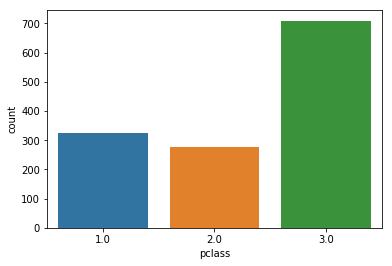

In [62]:
# Plot distribution of cabin class
sns.countplot("pclass", data = titanic_df)
sns.countplot?

In [67]:
# Look at age distribution
round(np.mean(titanic_df["age"]), 1)

29.9

In [79]:
# Alterative
titanic_df["age"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

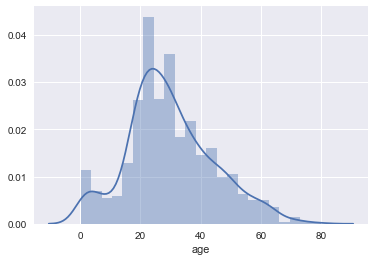

In [77]:
# Draw age distribution
sns.distplot(titanic_df.dropna()["age"])

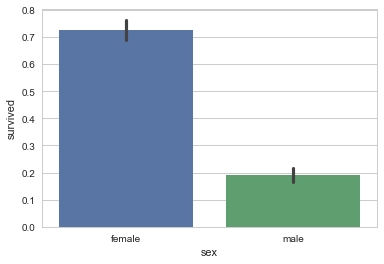

In [82]:
# Did survival probability depend on gender? Draw plot
sns.barplot(x="sex", y="survived", data=titanic_df)

In [85]:
# Did survival probability depend on gender? Compute table
round(titanic_df.groupby("sex")["survived"].mean(), 2)

sex
female    0.73
male      0.19
Name: survived, dtype: float64

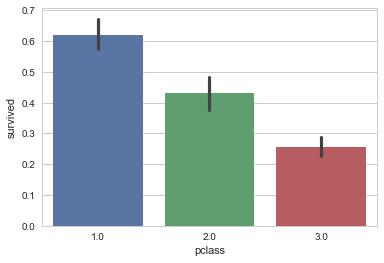

In [86]:
# Did survival probability depend on cabin class?
sns.barplot(x="pclass", y="survived", data=titanic_df)

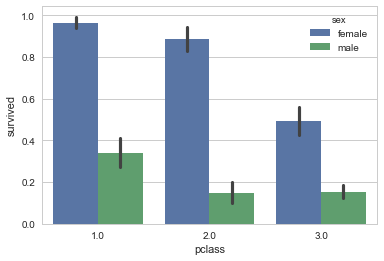

In [87]:
# Look at survical as a function of both sex and pclass
# Version 1
sns.barplot(x="pclass", y="survived", hue="sex", data=titanic_df)

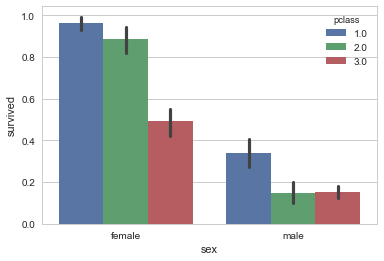

In [88]:
# Look at survical as a function of both sex and pclass
# Version 1
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic_df)

In [92]:
# Computer survival probability as a function of both sex and pclass
round(titanic_df.groupby(["pclass", "sex"])["survived"].mean().unstack(), 2)

sex,female,male
pclass,,
1.0,0.97,0.34
2.0,0.89,0.15
3.0,0.49,0.15


In [ ]:
# How did survival probability depend on age?



## Questions

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?



Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?



So let's start with the first question: Who were the passengers on the titanic?

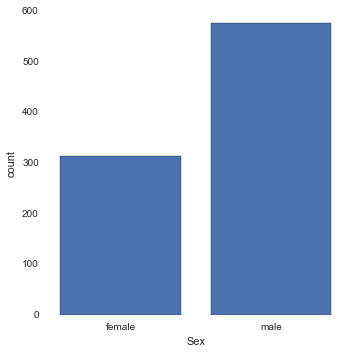

In [7]:
# quick look at the sex of people on the titanic

""" we will use factor plot for this which takes a coloum name 
and divide on the basis of the avaliable data. """

sns.factorplot('Sex', data=titanic_df)

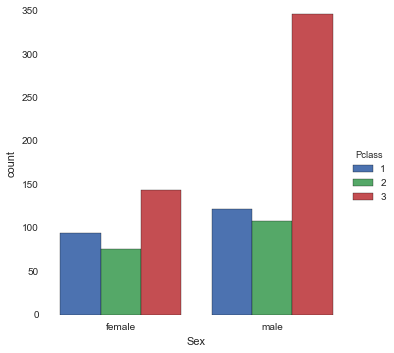

In [10]:
# Male and female in each class

sns.factorplot('Sex', data=titanic_df, hue='Pclass')

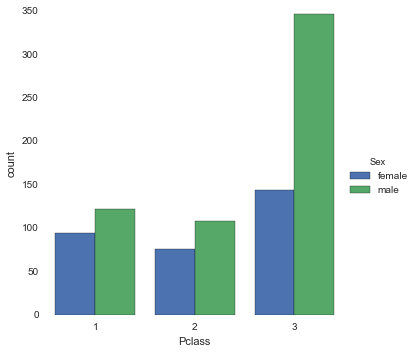

In [11]:
# better way

sns.factorplot('Pclass', data=titanic_df, hue='Sex')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children. How can we go about this?

In [20]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column


def male_female_child(passenger):
    
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    
# creating a passenger coloumn in the titanic_df

# since it is a coloumn and not index we need to set axis to 1
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [21]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,child


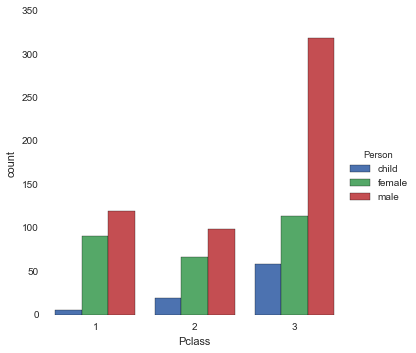

In [22]:
# factor plot for person

sns.factorplot("Pclass", data=titanic_df, hue="Person")

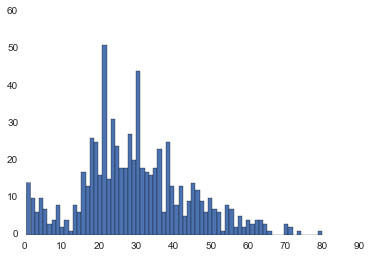

In [33]:
# hist plot of ages

titanic_df['Age'].hist(bins=70)

In [34]:
# find the mean age

titanic_df['Age'].mean()

29.69911764705882

In [35]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
person         891 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 104.4+ KB


In [36]:
# removinf a coloumn from data frame

titanic_df.drop('person', axis=1, inplace=True)

In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [41]:
# to get details of each individual sex in person

titanic_df['Person'].value_counts()

male      537
female    271
child      83
dtype: int64

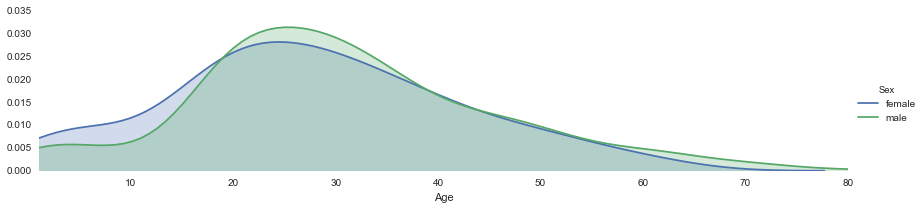

In [47]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas 
# dataframe as its data source, set the hue, and change the aspect ratio.

fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(1, oldest))

fig.add_legend()

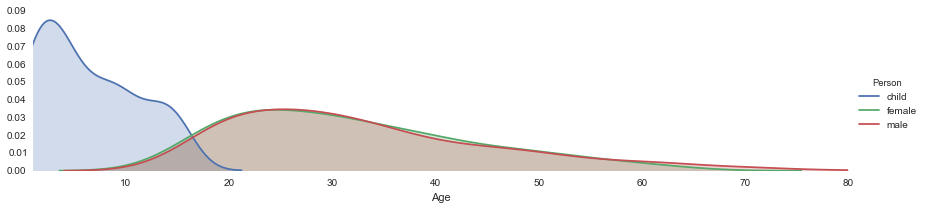

In [48]:
# similary plotting for person

fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(1, oldest))

fig.add_legend()

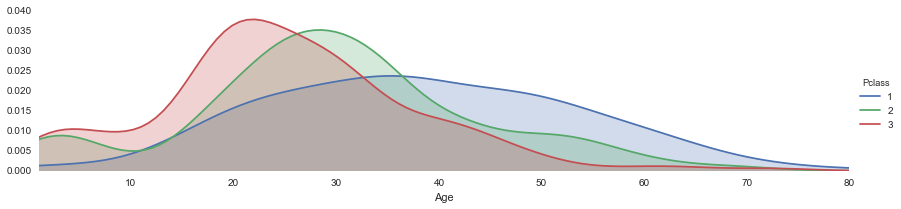

In [51]:
# similary plotting for class

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(1, oldest))

fig.add_legend()

In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [5]:
# First we'll drop the NaN values and create a new object, deck

deck = titanic_df['Cabin'].dropna()

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

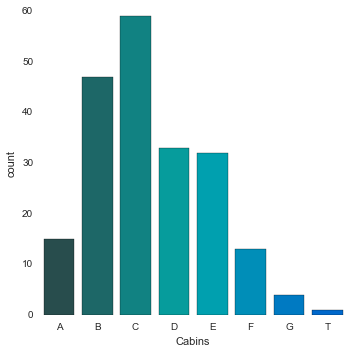

In [6]:
# We need only first letter in the deck not we will remove the rest of the data

levels = []

# grabbing the First letter 
for i in deck:
    levels.append(i[0])
    
# Make a cabin dataFrame
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabins']

sns.factorplot('Cabins', data=cabin_df, palette='winter_d')

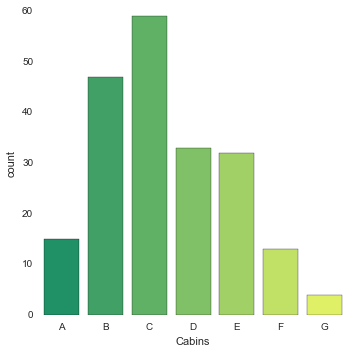

In [77]:
# Redefine cabin_df as everything but where the row was equal to 'T'

cabin_df = cabin_df[cabin_df.Cabins != 'T']

sns.factorplot('Cabins', data=cabin_df, palette='summer')


Now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

3.) Where did the passengers come from?

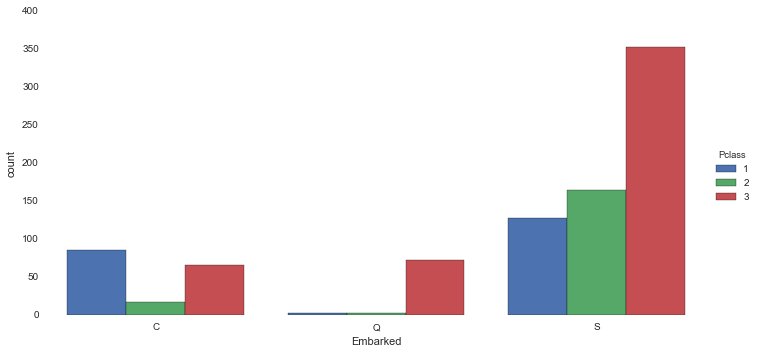

In [87]:
# Factor plot of where people came from.

''' plot tells how many people came from which places and which class '''

# by using x_order we can remove the nan plots
sns.factorplot('Embarked', data=titanic_df, x_order=['C', 'Q', 'S'], hue='Pclass', aspect=2)


An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Now let's take a look at the 4th question:

4.) Who was alone and who was with family?

In [92]:
# Adding alone column

titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [93]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,With family


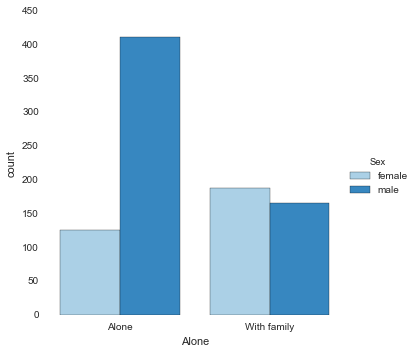

In [96]:
# plotting 

sns.factorplot('Alone', data=titanic_df, palette='Blues', hue='Sex')

Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

In [99]:
# Making a survivor column using surivived values

titanic_df['survivor'] = titanic_df.Survived.map({0: 'No', 1:"Yes"})

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,No
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,No
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone,No
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With family,No
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With family,Yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child,With family,Yes


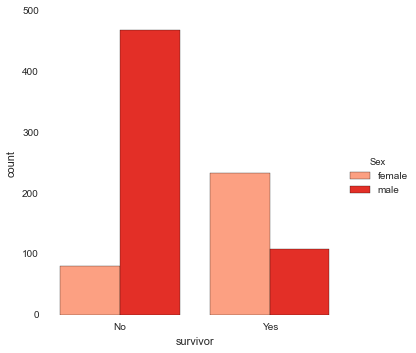

In [101]:
# survival of men and women

sns.factorplot('survivor', data=titanic_df, palette='Reds', hue='Sex')

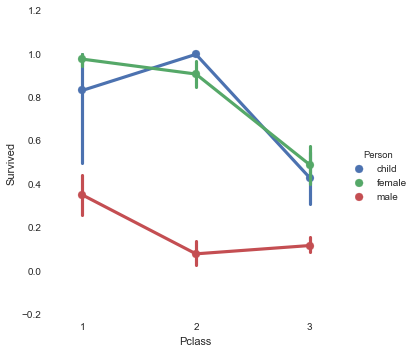

In [109]:
# survival based on class

#sns.factorplot('survivor', data=titanic_df, palette='Reds', hue='Pclass')

sns.factorplot('Pclass', 'Survived', data=titanic_df)

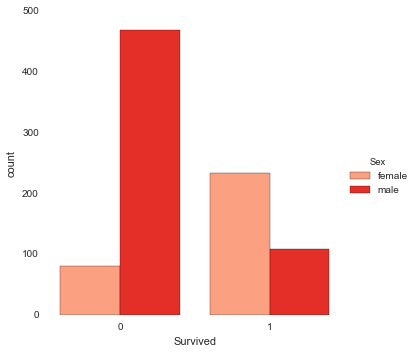

In [108]:
sns.factorplot('Survived', data=titanic_df, palette='Reds', hue='Sex')

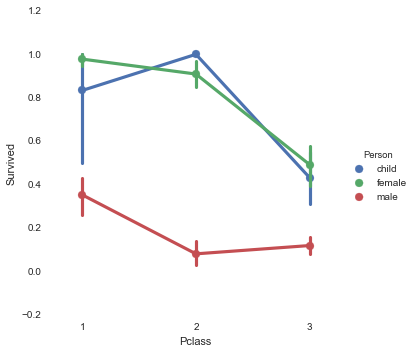

In [110]:
# unfavouriable conditions for survival.

sns.factorplot('Pclass', 'Survived', data=titanic_df, hue='Person')


From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

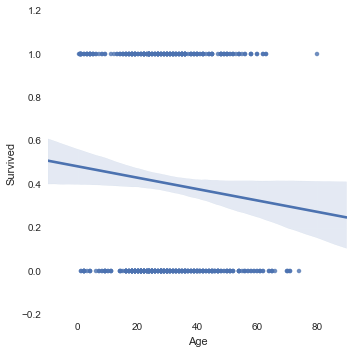

In [111]:
sns.lmplot('Age', 'Survived', data=titanic_df)


Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

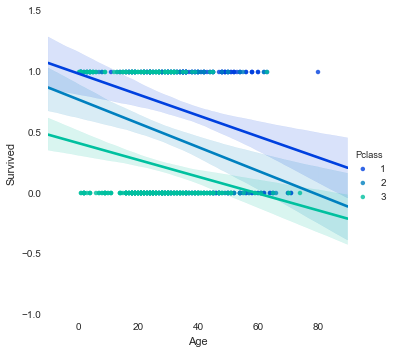

In [112]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')


We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

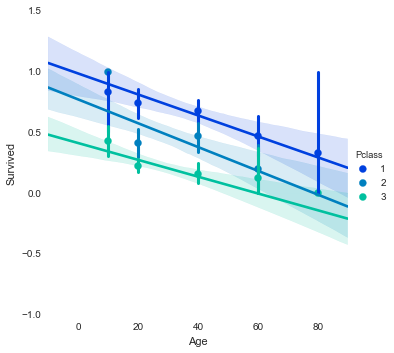

In [114]:
# cleaning up the plot

generations = [10, 20, 40, 60, 80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter', x_bins=generations)

 What about if we relate gender and age with the survival set?

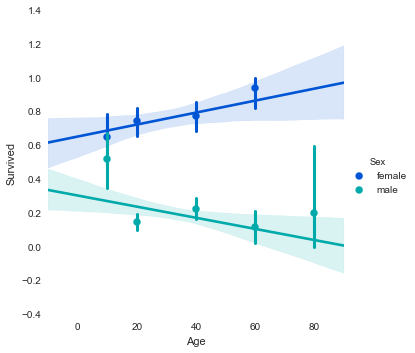

In [115]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter', x_bins=generations)

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

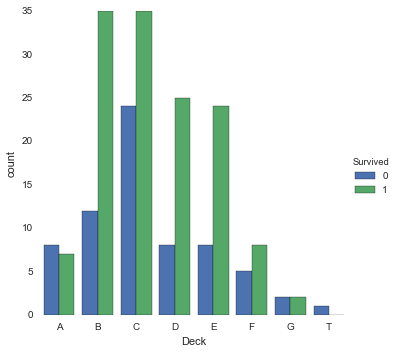

In [168]:
# concatinating the data frames

deck = []

for i in titanic_df['Cabin']:
    
    if str(i) == 'NaN':
        deck.append(0)
    else:
        deck.append(str(i)[0])
        
titanic_df['Deck'] = deck

sns.factorplot('Deck', x_order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], data=titanic_df, hue='Survived')

2.) Did having a family member increase the odds of surviving the crash?

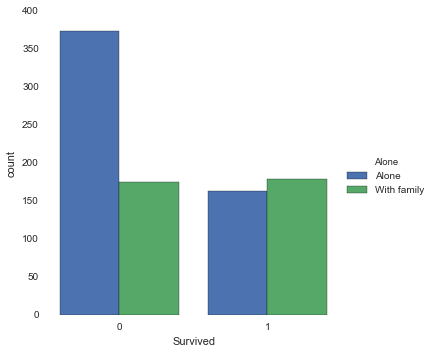

In [123]:
sns.factorplot('Survived', data=titanic_df, hue='Alone')

In [125]:
titanic_df['Alone'].value_counts()

Alone          537
With family    354
dtype: int64

In [130]:
from IPython.display import Image
Image(url='http://i.imgur.com/DGNjT.gif')